# Materials Science Machine Learning Project

## Project Timeline (8 Weeks)

### Week 1-2: Data Exploration and Preprocessing
- Perform comprehensive EDA on materials science dataset
- Clean and preprocess data
- Handle missing values and outliers
- Feature engineering and selection

### Week 3-4: Model Development
- Implement and compare multiple ML algorithms:
  - Random Forest
  - Gradient Boosting
  - Neural Networks
  - Support Vector Machines
- Hyperparameter tuning using GridSearchCV/RandomizedSearchCV
- Cross-validation and model evaluation

### Week 5-6: Model Optimization
- Feature importance analysis
- Ensemble methods
- Advanced techniques (e.g., stacking, boosting)
- Model interpretability using SHAP/LIME

### Week 7: API Development
- Develop Flask/FastAPI for model deployment
- Create prediction endpoints
- Implement data validation
- Add documentation

### Week 8: Finalization and Deployment
- Model deployment
- Performance monitoring
- Documentation completion
- Project presentation

## Project Goals
1. Develop a high-accuracy predictive model for materials properties
2. Create an interpretable model that provides insights into material characteristics
3. Build a robust API for real-time predictions
4. Document the entire process and findings

## Success Metrics
- Model accuracy > 90%
- Robust API with error handling
- Comprehensive documentation
- Clear visualization of results

## Deliverables
1. Clean, preprocessed dataset
2. Trained and optimized ML model
3. API for predictions
4. Documentation and presentation
5. Code repository with all scripts

# Materials Science Dataset EDA

This script performs exploratory data analysis on the materials science dataset to understand its characteristics, distributions, and relationships between features.

## 1. Setup and Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import os
from pymongo import MongoClient
from dbconfig import MONGO_URI, MONGO_DB, MONGO_JSON_COLLECTION

# Set plotting style
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This will set the seaborn theme
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2. Data Loading and Initial Overview

In [3]:
# Load data from CSV
df = pd.read_csv('materials_for_ml.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

print("\nBasic statistics:")
display(df.describe())

Dataset shape: (9834, 102)

First few rows:


,material_id,formula,nelements,nsites,density,volume,band_gap,is_metal,formation_energy_per_atom,energy_per_atom,...,contains_Ga,contains_Tm,contains_Nb,contains_I,contains_P,contains_Mo,contains_Ac,contains_Ge,contains_U,dielectric_constant
0,mp-555976,Na2TiSiO5,4,36,2.993781,448.010204,3.2081,False,-2.997264,-7.520115,...,False,False,False,False,False,False,False,False,False,1.805960
1,mp-23764,Mg3Si2H4O9,4,18,2.496248,184.339019,4.4559,False,-2.591320,-6.688766,...,False,False,False,False,False,False,False,False,False,1.590880
2,mp-28987,NaPt2Se3,3,24,7.563650,570.842419,0.9897,False,-0.815467,-4.807479,...,False,False,False,False,False,False,False,False,False,3.475688
3,mp-1227994,BaAlSi5N7O2,5,16,3.609992,199.992680,4.0159,False,-1.805305,-8.120461,...,False,False,False,False,False,False,False,False,False,1.999772
4,mp-29157,Si3P2Pt,3,12,5.429212,208.767733,0.6067,False,-0.371942,-5.900851,...,False,False,False,False,True,False,False,False,False,4.358090



Data types:


material_id             object
formula                 object
nelements                int64
nsites                   int64
density                float64
                        ...   
contains_Mo               bool
contains_Ac               bool
contains_Ge               bool
contains_U                bool
dielectric_constant    float64
Length: 102, dtype: object


Basic statistics:


,nelements,nsites,density,volume,band_gap,formation_energy_per_atom,energy_per_atom,dielectric_constant
count,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,3157.000000
mean,3.756457,47.224629,4.262489,689.648777,1.830574,-1.773119,-6.595265,2.411982
std,1.225916,55.437126,2.297191,780.284047,1.759838,1.179025,1.604483,4.166119
min,1.000000,1.000000,0.126373,11.918569,0.000000,-4.491319,-11.118024,0.000000
25%,3.000000,12.000000,2.823110,198.869114,0.000000,-2.768377,-7.755719,1.682596
50%,4.000000,26.000000,3.499536,390.190523,1.545450,-2.143311,-7.010916,2.025107
75%,4.000000,56.000000,5.107257,834.630451,3.100275,-0.680235,-5.647075,2.540842
max,9.000000,432.000000,17.916160,8059.216642,8.375100,5.212425,-0.302192,216.466881


## 3. Missing Value Analysis

Missing Value Analysis:


,Missing Values,Percentage
dielectric_constant,6677,67.897092


<Figure size 1200x600 with 0 Axes>

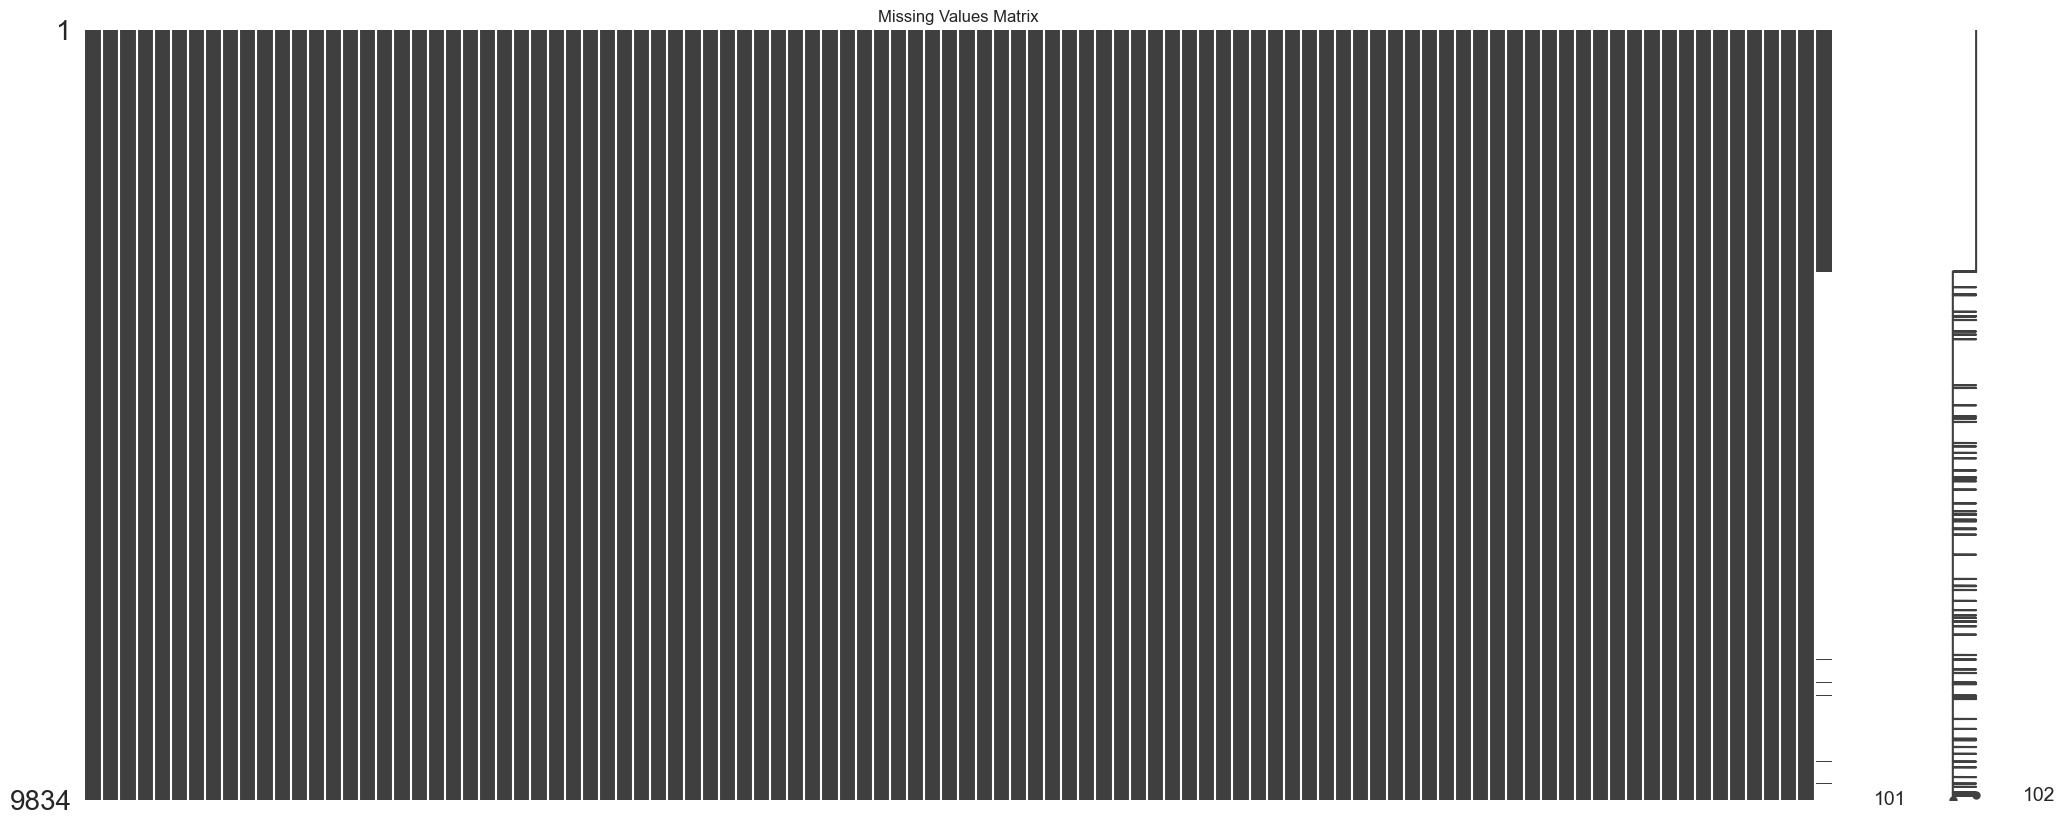

In [4]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Value Analysis:")
display(missing_data[missing_data['Missing Values'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

## 4. Target Variable Analysis (Band Gap)

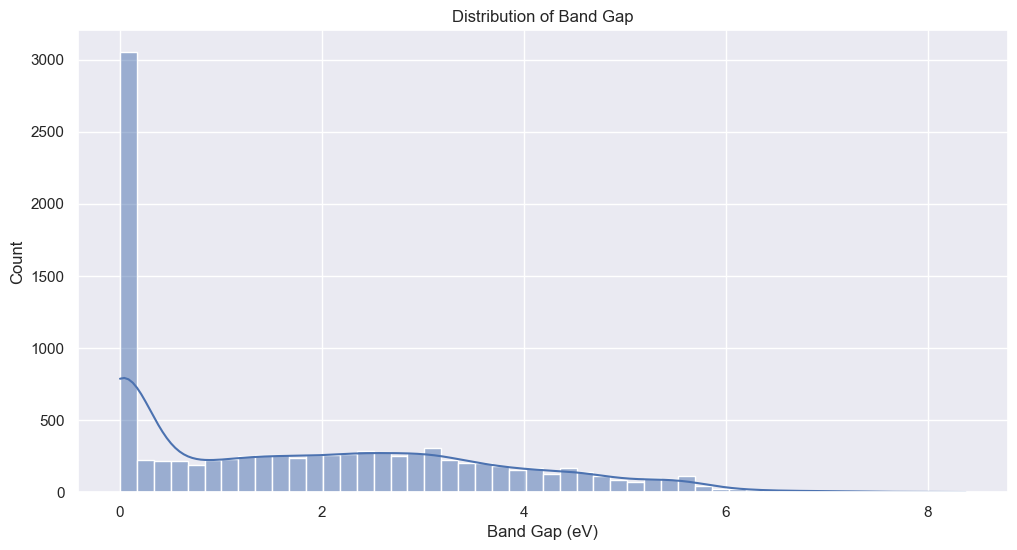

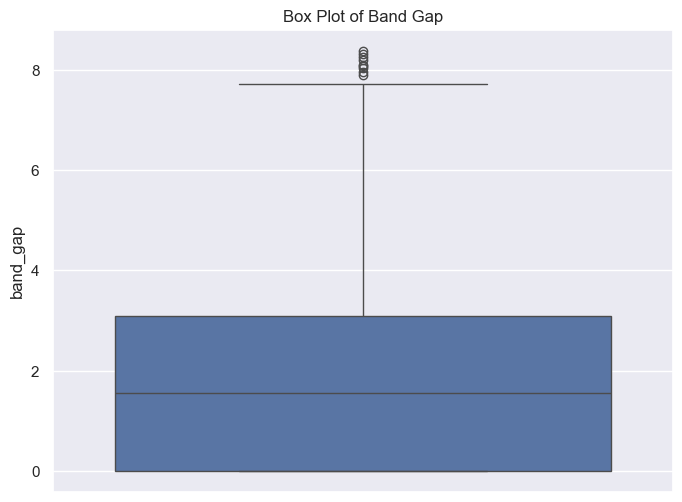

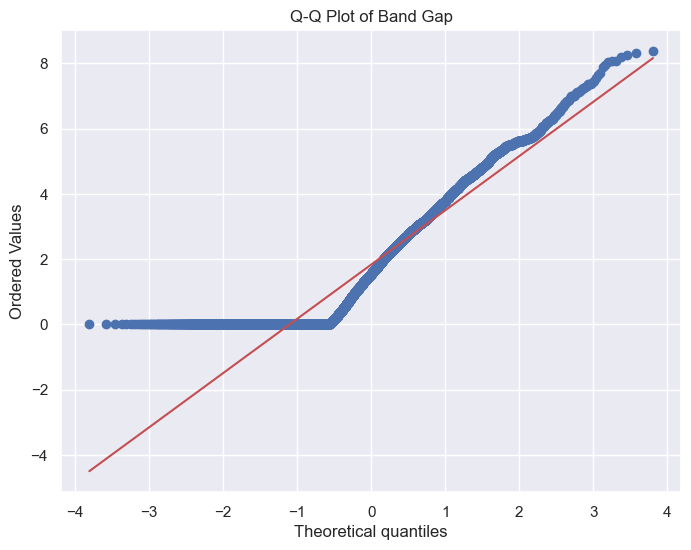

In [5]:
# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(df['band_gap'], bins=50, kde=True)
plt.title('Distribution of Band Gap')
plt.xlabel('Band Gap (eV)')
plt.ylabel('Count')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['band_gap'])
plt.title('Box Plot of Band Gap')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['band_gap'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Band Gap')
plt.show()

## 5. Feature Distributions

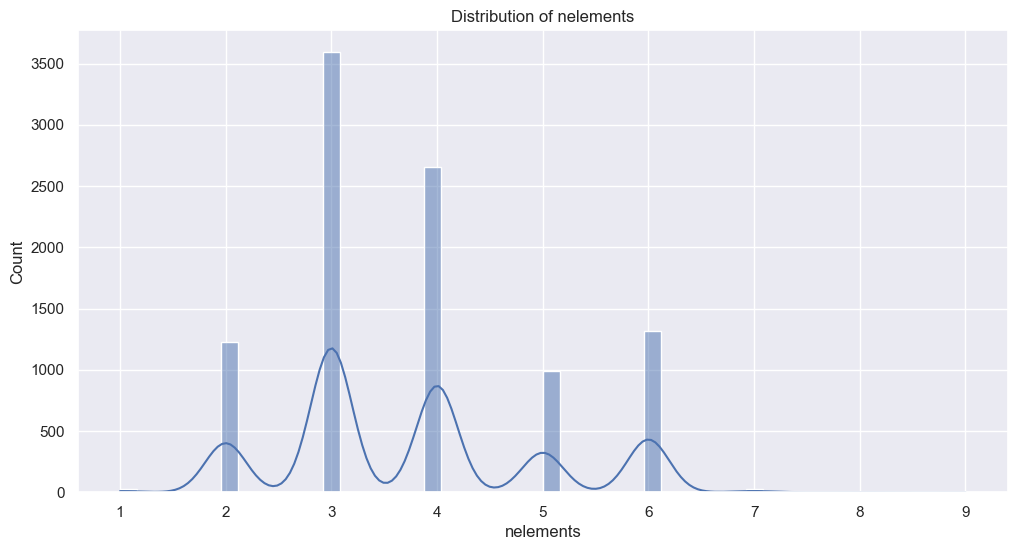

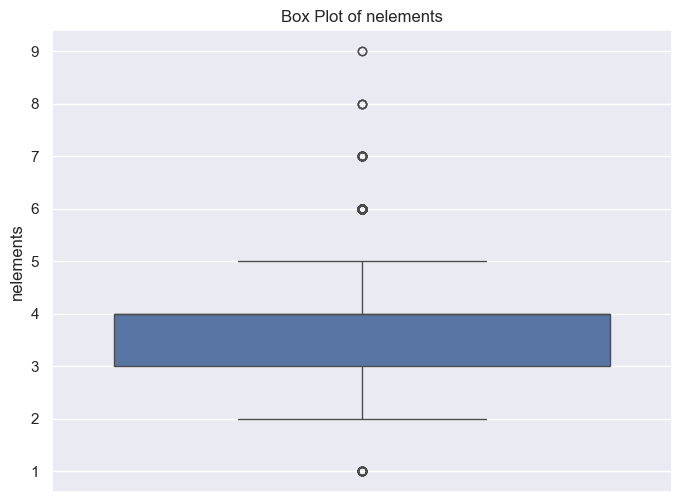

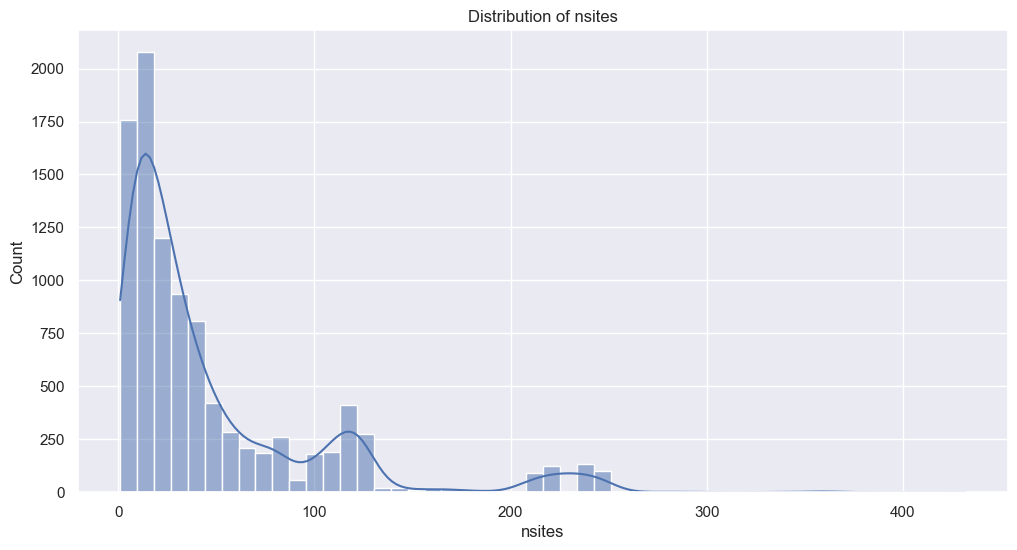

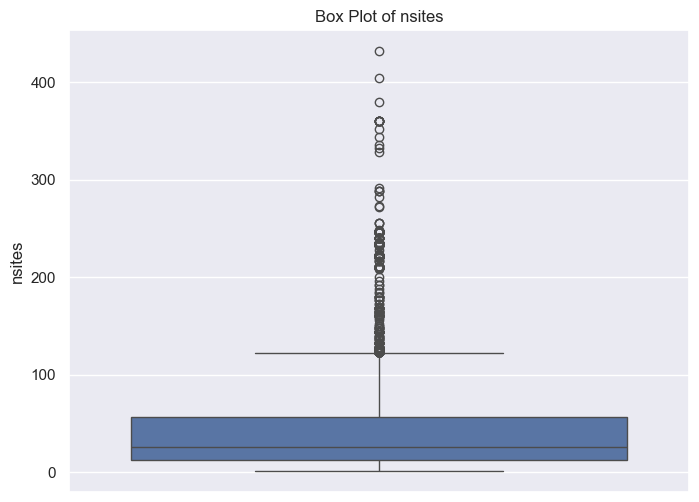

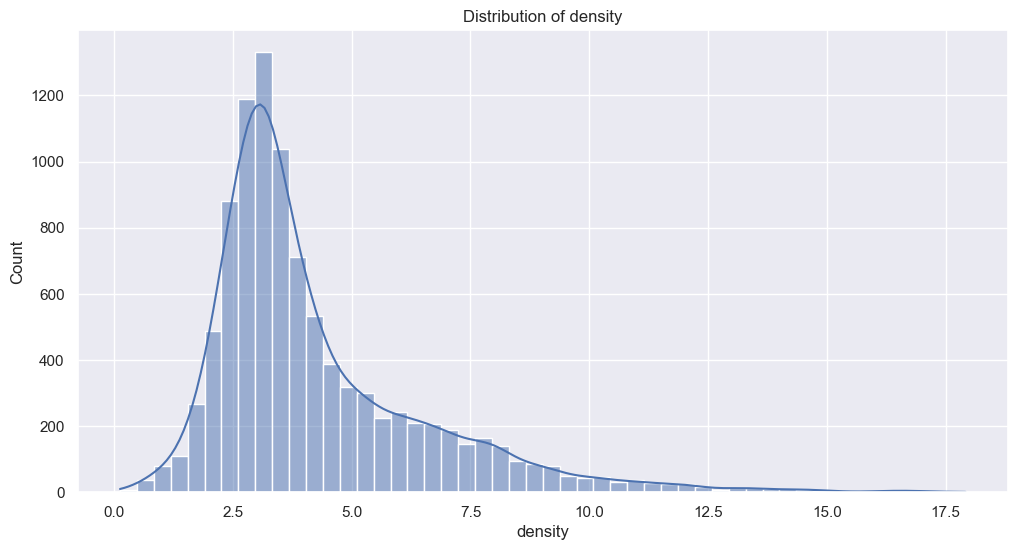

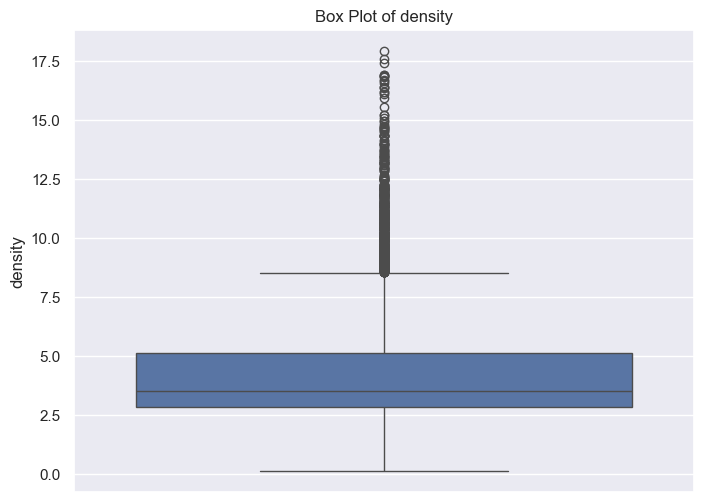

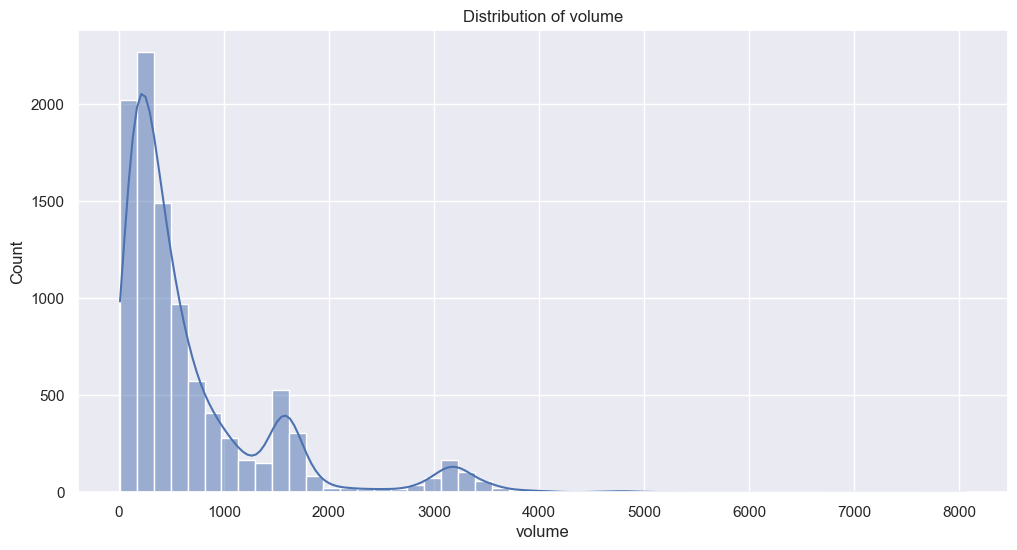

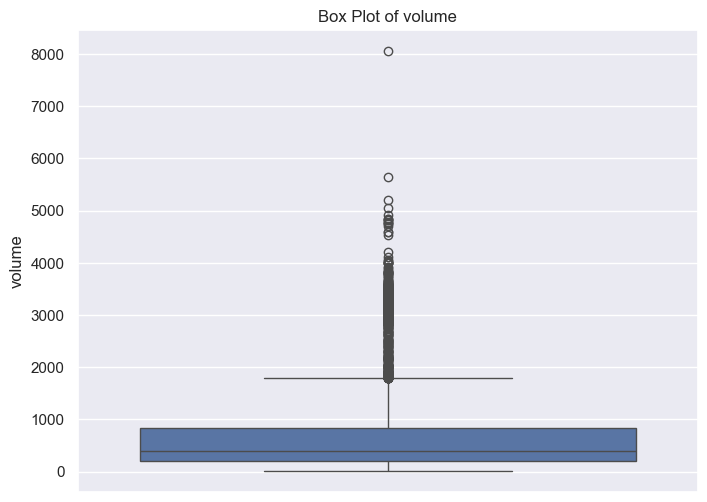

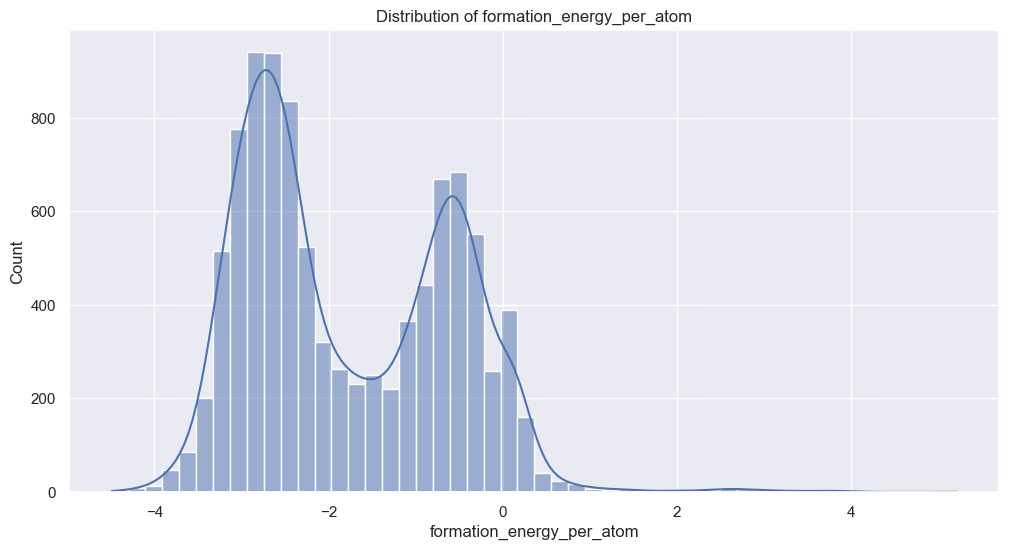

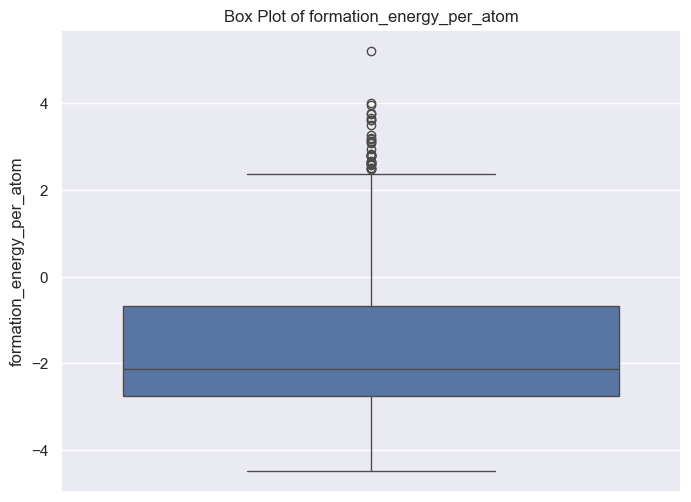

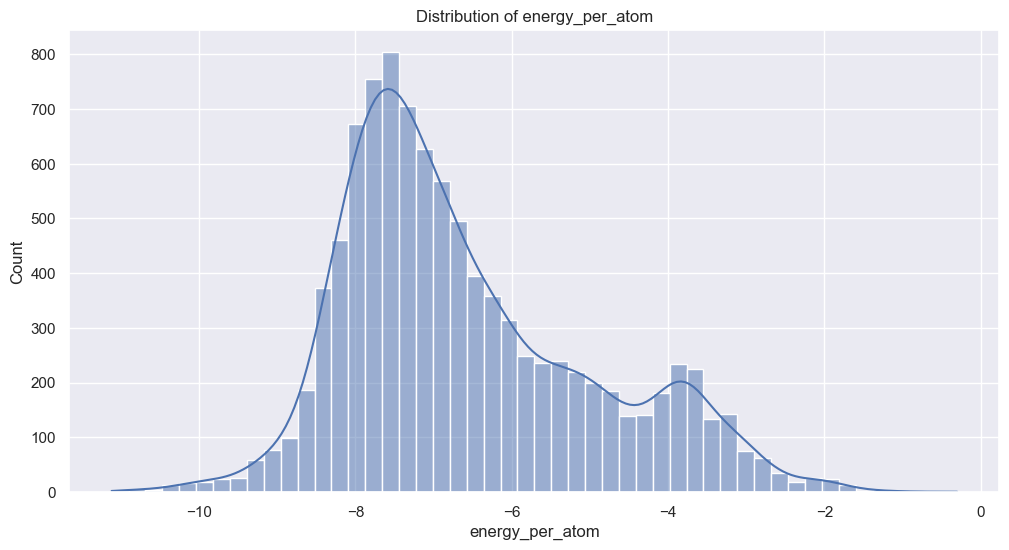

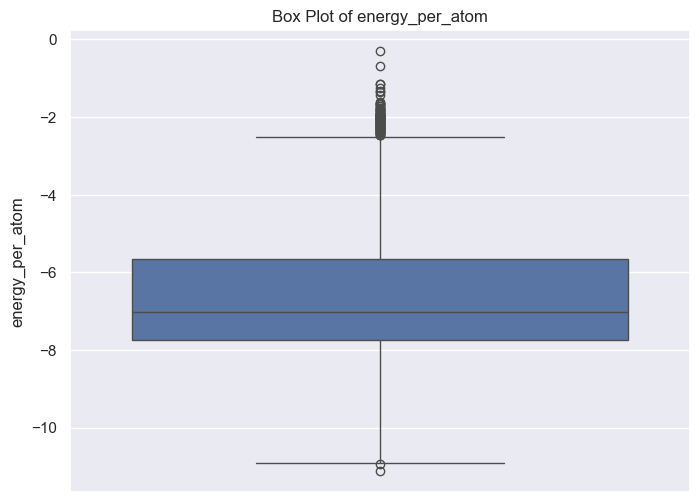

In [6]:
# Select numerical features
numerical_features = ['nelements', 'nsites', 'density', 'volume', 'formation_energy_per_atom', 'energy_per_atom']

# Plot distributions for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## 6. Correlation Analysis

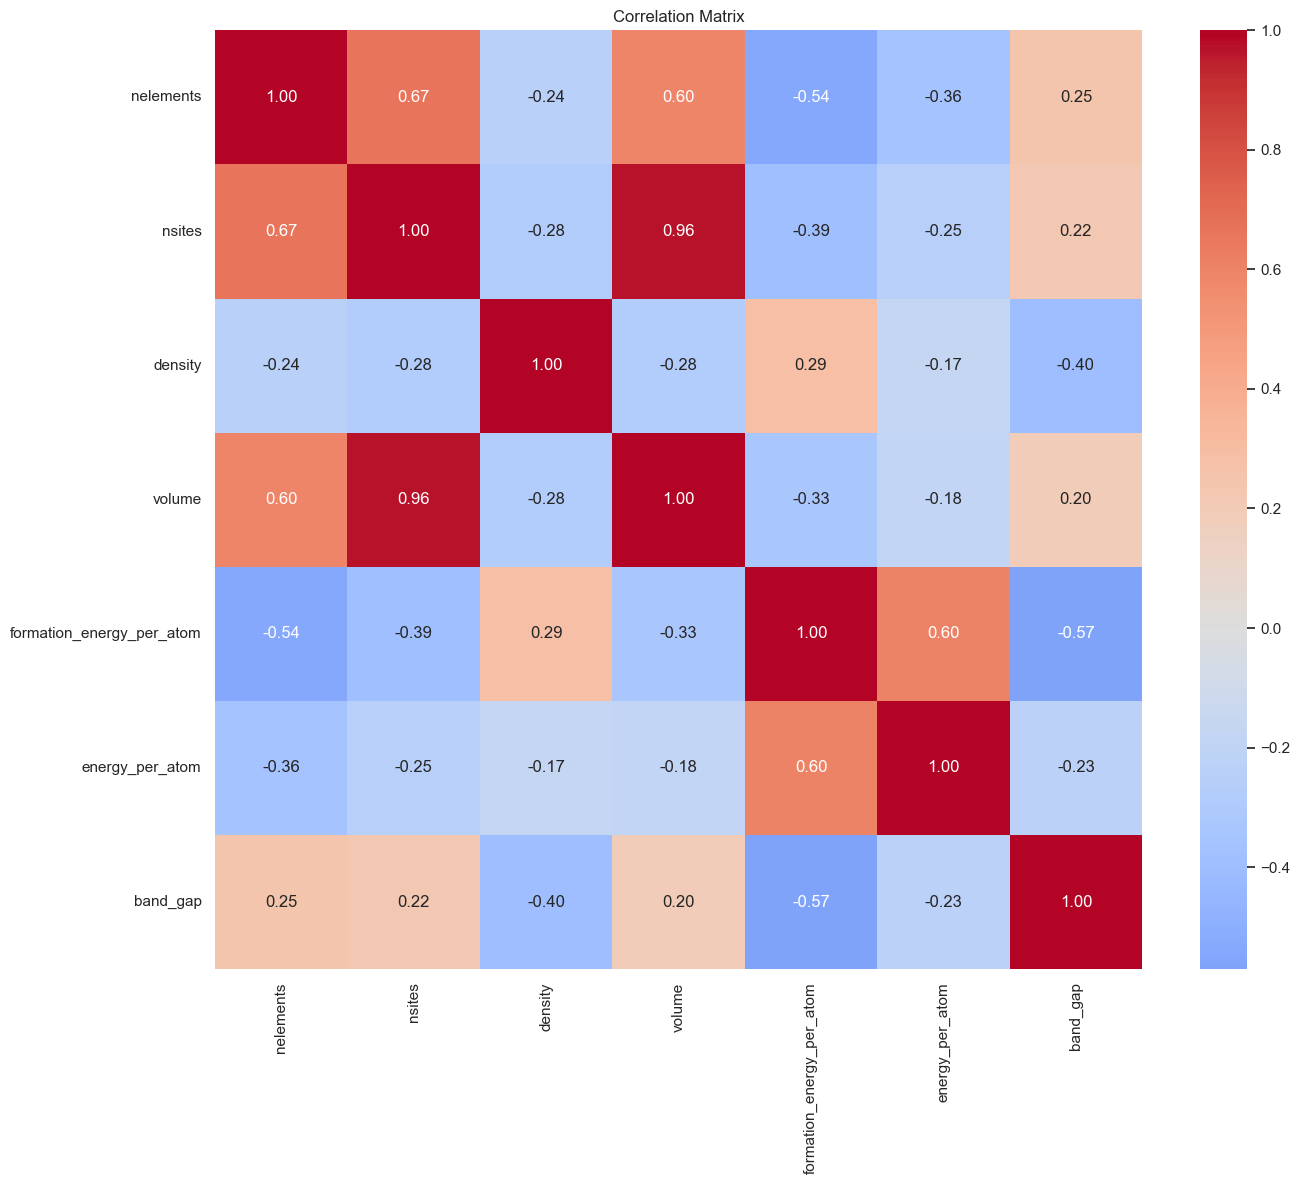

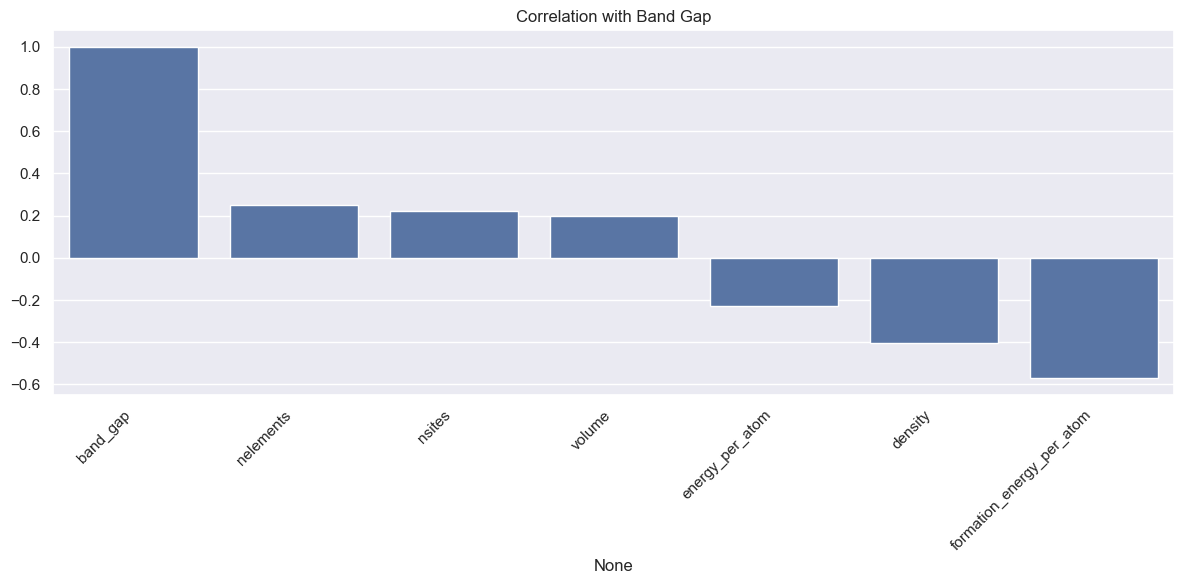

In [7]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['band_gap']].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Plot correlation with band gap
target_correlations = correlation_matrix['band_gap'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.title('Correlation with Band Gap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Crystal System Analysis

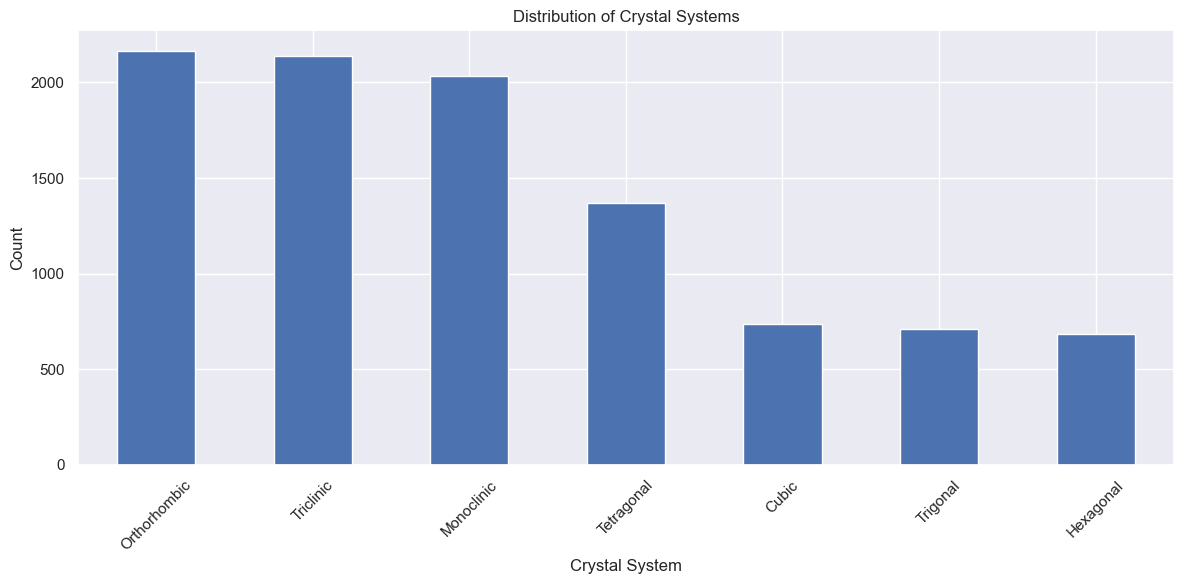

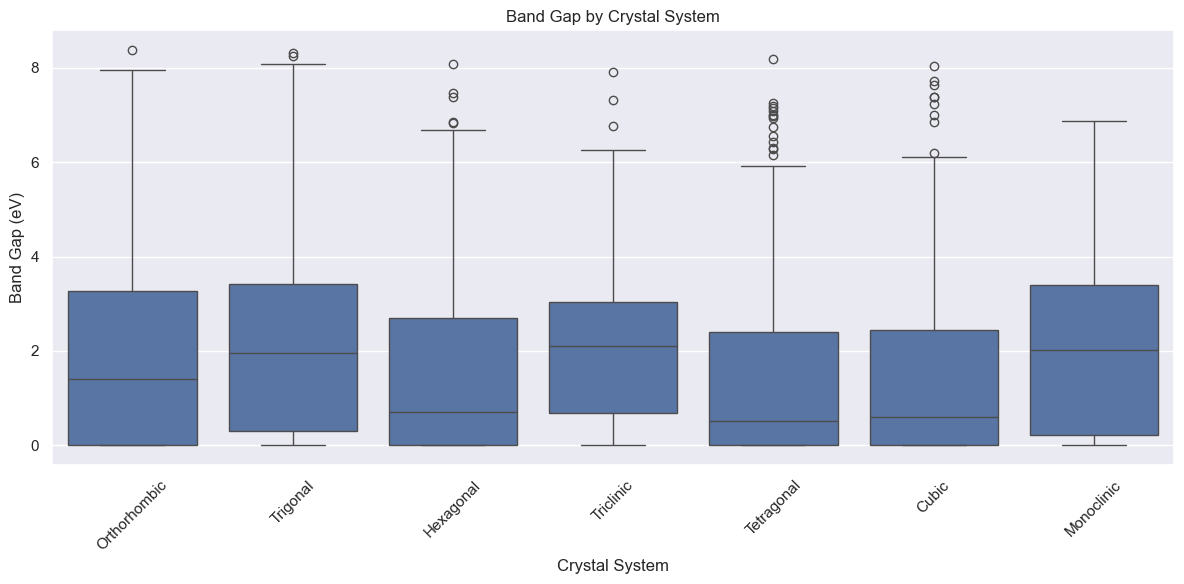

In [8]:
# Crystal system distribution
plt.figure(figsize=(12, 6))
df['crystal_system'].value_counts().plot(kind='bar')
plt.title('Distribution of Crystal Systems')
plt.xlabel('Crystal System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Band gap by crystal system
plt.figure(figsize=(12, 6))
sns.boxplot(x='crystal_system', y='band_gap', data=df)
plt.title('Band Gap by Crystal System')
plt.xlabel('Crystal System')
plt.ylabel('Band Gap (eV)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Element Analysis

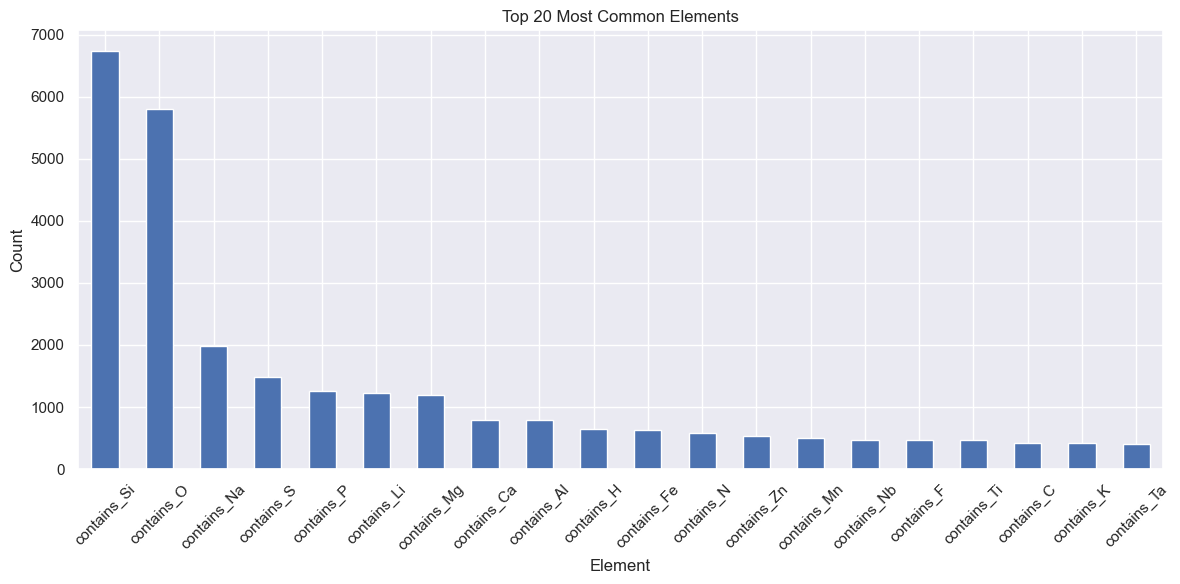

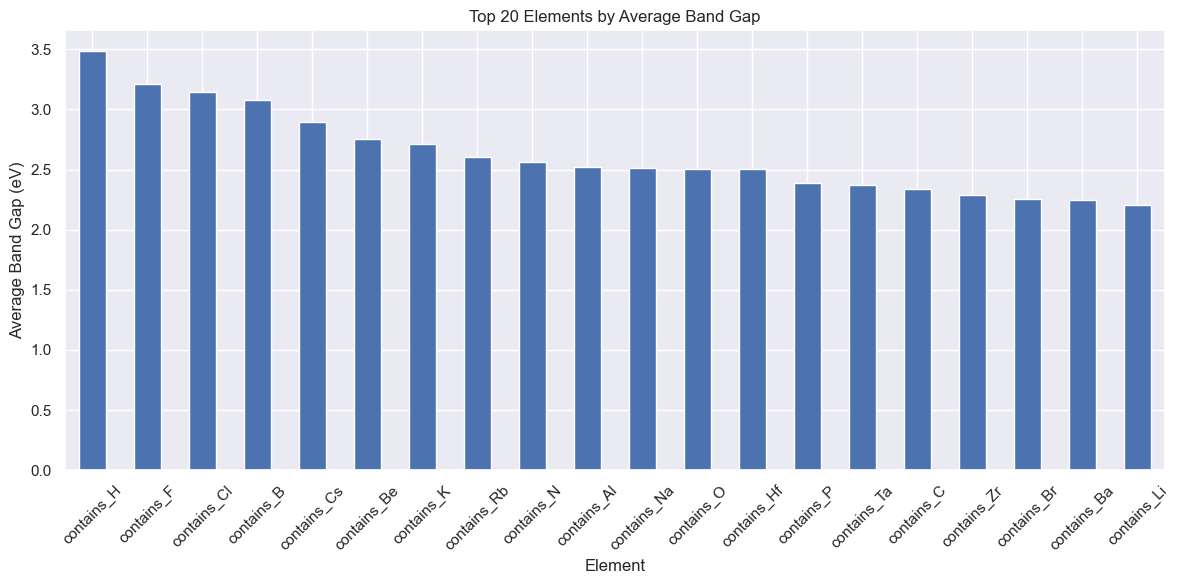

In [9]:
# Count elements in materials
element_columns = [col for col in df.columns if col.startswith('contains_')]
element_counts = df[element_columns].sum().sort_values(ascending=False)

# Plot top 20 elements
plt.figure(figsize=(12, 6))
element_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Elements')
plt.xlabel('Element')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average band gap by element presence
element_band_gaps = {}
for element in element_columns:
    element_band_gaps[element] = df[df[element]]['band_gap'].mean()

element_band_gaps = pd.Series(element_band_gaps).sort_values(ascending=False)

# Plot top 20 elements by average band gap
plt.figure(figsize=(12, 6))
element_band_gaps.head(20).plot(kind='bar')
plt.title('Top 20 Elements by Average Band Gap')
plt.xlabel('Element')
plt.ylabel('Average Band Gap (eV)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Outlier Analysis


Outliers in nelements:
Number of outliers: 1378
Percentage of outliers: 14.01%


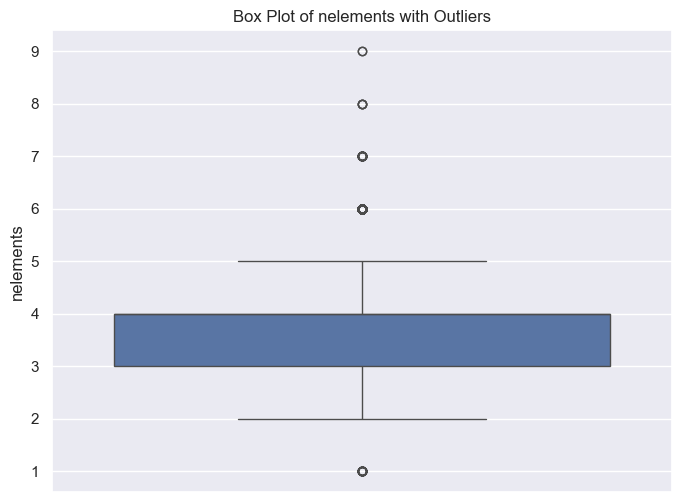


Outliers in nsites:
Number of outliers: 847
Percentage of outliers: 8.61%


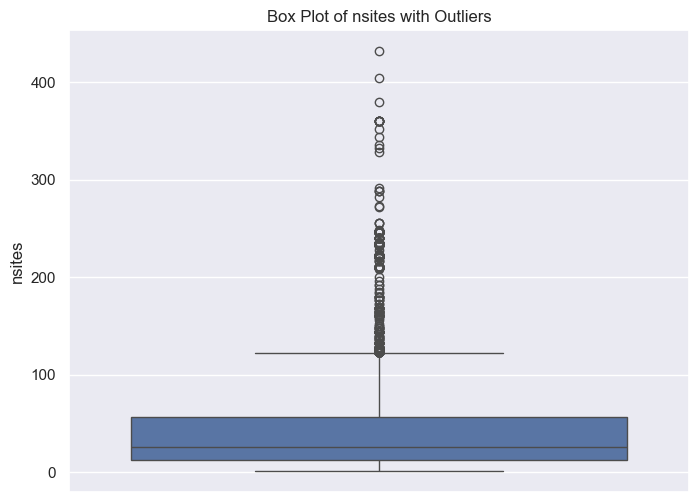


Outliers in density:
Number of outliers: 584
Percentage of outliers: 5.94%


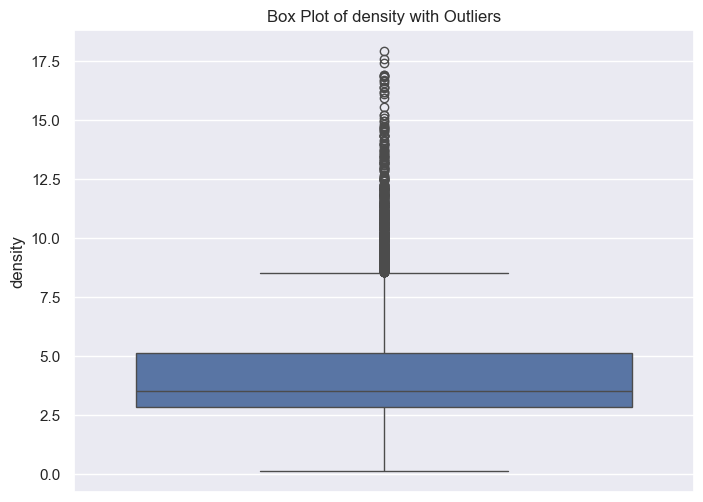


Outliers in volume:
Number of outliers: 672
Percentage of outliers: 6.83%


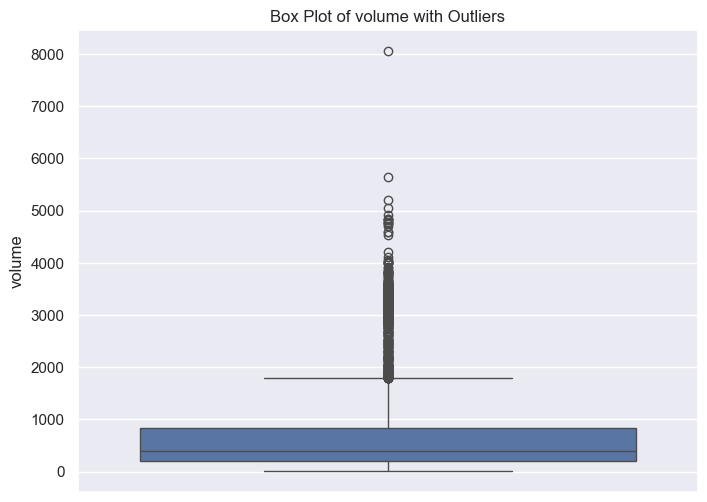


Outliers in formation_energy_per_atom:
Number of outliers: 33
Percentage of outliers: 0.34%


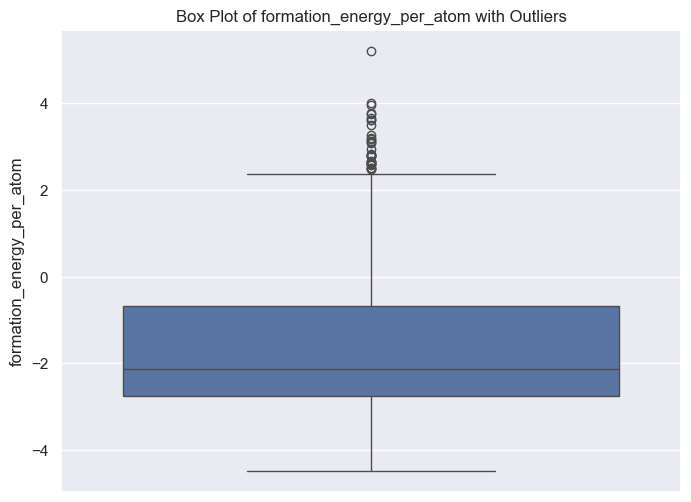


Outliers in energy_per_atom:
Number of outliers: 92
Percentage of outliers: 0.94%


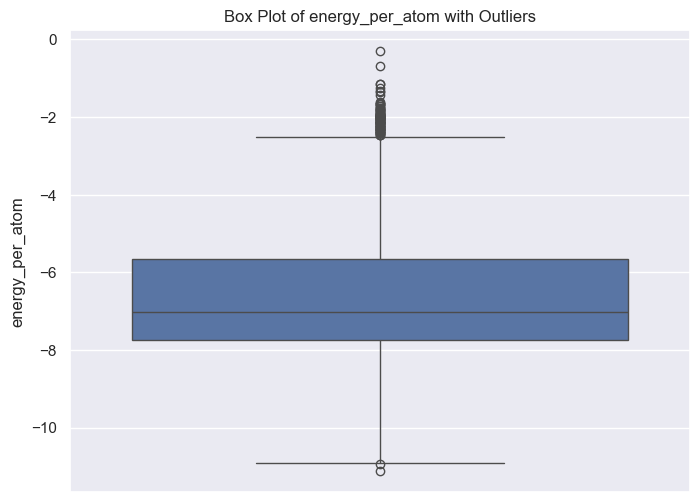


Outliers in band_gap:
Number of outliers: 9
Percentage of outliers: 0.09%


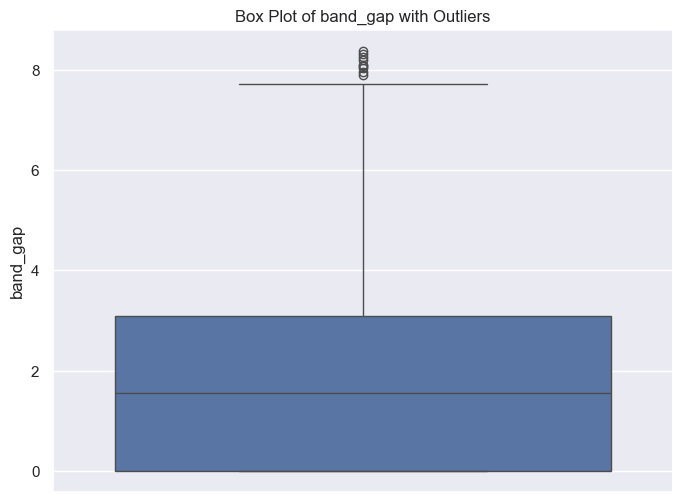

In [10]:
# Function to detect outliers using IQR method
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Analyze outliers for each numerical feature
for feature in numerical_features + ['band_gap']:
    outliers = detect_outliers(df, feature)
    if len(outliers) > 0:
        print(f"\nOutliers in {feature}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
        
        # Plot box plot with outliers highlighted
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[feature])
        plt.title(f'Box Plot of {feature} with Outliers')
        plt.show()

## 10. Summary and Insights

In [11]:
# Generate summary statistics
summary_stats = df.describe()

# Calculate skewness and kurtosis
skewness = df[numerical_features + ['band_gap']].skew()
kurtosis = df[numerical_features + ['band_gap']].kurtosis()

print("Summary Statistics:")
display(summary_stats)

print("\nSkewness:")
display(skewness)

print("\nKurtosis:")
display(kurtosis)

# Print key insights
print("\nKey Insights:")
print(f"1. Dataset contains {len(df)} materials with {len(df.columns)} features")
print(f"2. Missing values percentage: {df.isnull().sum().sum()/df.size*100:.2f}%")
print(f"3. Number of numerical features: {len(numerical_features)}")
print(f"4. Number of categorical features: {len(df.select_dtypes(include=['object', 'bool']).columns)}")
print(f"5. Band gap statistics:")
print(f"   - Mean: {df['band_gap'].mean():.2f} eV")
print(f"   - Median: {df['band_gap'].median():.2f} eV")
print(f"   - Standard Deviation: {df['band_gap'].std():.2f} eV")
print(f"   - Range: {df['band_gap'].min():.2f} to {df['band_gap'].max():.2f} eV") 

Summary Statistics:


,nelements,nsites,density,volume,band_gap,formation_energy_per_atom,energy_per_atom,dielectric_constant
count,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,3157.000000
mean,3.756457,47.224629,4.262489,689.648777,1.830574,-1.773119,-6.595265,2.411982
std,1.225916,55.437126,2.297191,780.284047,1.759838,1.179025,1.604483,4.166119
min,1.000000,1.000000,0.126373,11.918569,0.000000,-4.491319,-11.118024,0.000000
25%,3.000000,12.000000,2.823110,198.869114,0.000000,-2.768377,-7.755719,1.682596
50%,4.000000,26.000000,3.499536,390.190523,1.545450,-2.143311,-7.010916,2.025107
75%,4.000000,56.000000,5.107257,834.630451,3.100275,-0.680235,-5.647075,2.540842
max,9.000000,432.000000,17.916160,8059.216642,8.375100,5.212425,-0.302192,216.466881



Skewness:


nelements                    0.529692
nsites                       2.169365
density                      1.735345
volume                       2.225218
formation_energy_per_atom    0.503532
energy_per_atom              0.737302
band_gap                     0.650623
dtype: float64


Kurtosis:


nelements                   -0.471313
nsites                       5.011300
density                      3.819967
volume                       5.555676
formation_energy_per_atom   -0.272871
energy_per_atom             -0.018190
band_gap                    -0.521893
dtype: float64


Key Insights:
1. Dataset contains 9834 materials with 102 features
2. Missing values percentage: 0.67%
3. Number of numerical features: 6
4. Number of categorical features: 94
5. Band gap statistics:
   - Mean: 1.83 eV
   - Median: 1.55 eV
   - Standard Deviation: 1.76 eV
   - Range: 0.00 to 8.38 eV
